<a href="https://colab.research.google.com/github/peeush-agarwal/week-based-learning/blob/master/Deep-Learning/RNNs/CharacterLevelRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! unzip '/content/drive/My Drive/Colab Notebooks/data.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [0]:
base_path = 'data/names'

In [0]:
import os
import glob
from io import open
import unicodedata
import string
import random

In [22]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

print(all_letters)
print(n_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


In [23]:
# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [0]:
all_categories = []
category_line = {}
for data_file in glob.glob(base_path+'/*.txt'):
  category = os.path.splitext(os.path.basename(data_file))[0]
  all_categories.append(category)
  lines = open(data_file).read().strip().split('\n')
  category_line[category] = [unicodeToAscii(line) for line in lines]
n_categories = len(all_categories)

In [29]:
print(n_categories)
for k, v in category_line.items():
  print(f"{k}: {len(v)} - {', '.join(v[:5])}")

18
Czech: 519 - Abl, Adsit, Ajdrna, Alt, Antonowitsch
French: 277 - Abel, Abraham, Adam, Albert, Allard
Greek: 203 - Adamidis, Adamou, Agelakos, Akrivopoulos, Alexandropoulos
Russian: 9408 - Ababko, Abaev, Abagyan, Abaidulin, Abaidullin
Vietnamese: 73 - Nguyen, Tron, Le, Pham, Huynh
Arabic: 2000 - Khoury, Nahas, Daher, Gerges, Nazari
Irish: 232 - Adam, Ahearn, Aodh, Aodha, Aonghuis
Scottish: 100 - Smith, Brown, Wilson, Campbell, Stewart
Chinese: 268 - Ang, AuYong, Bai, Ban, Bao
German: 724 - Abbing, Abel, Abeln, Abt, Achilles
Korean: 94 - Ahn, Baik, Bang, Byon, Cha
Japanese: 991 - Abe, Abukara, Adachi, Aida, Aihara
Portuguese: 74 - Abreu, Albuquerque, Almeida, Alves, Araujo
Spanish: 298 - Abana, Abano, Abarca, Abaroa, Abascal
Dutch: 297 - Aalsburg, Aalst, Aarle, Achteren, Achthoven
Polish: 139 - Adamczak, Adamczyk, Andrysiak, Auttenberg, Bartosz
Italian: 709 - Abandonato, Abatangelo, Abatantuono, Abate, Abategiovanni
English: 3668 - Abbas, Abbey, Abbott, Abdi, Abel


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [41]:
def charToTensor(c):
  tensor = torch.zeros((1, n_letters))
  tensor[0][all_letters.find(c)] = 1
  return tensor

print(charToTensor('b'))
print(charToTensor('b').shape)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])


In [42]:
def wordToTensor(word):
  tensor = torch.empty((len(word), 1, n_letters))
  for id, char in enumerate(word, 0):
    tensor[id] = charToTensor(char)
  return tensor

print(wordToTensor('Alb').shape)
print(wordToTensor('Alb'))

torch.Size([3, 1, 57])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])


In [0]:
class CharLevel_RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(CharLevel_RNN, self).__init__()

    self.hidden_size = hidden_size
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)

    self.softmax = nn.LogSoftmax(dim = 1)
  
  def forward(self, input, hidden_state):
    combined = torch.cat((input, hidden_state), dim=1)
    hidden = self.i2h(combined)
    output = self.softmax(self.i2o(combined))
    return output, hidden
  
  def init_hidden(self):
    return torch.zeros((1, self.hidden_size))

In [0]:
n_hidden = 128
model = CharLevel_RNN(n_letters, n_hidden, n_categories)
criterion = nn.NLLLoss()
lr = 0.001
# optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

In [0]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  category = all_categories[category_i]
  return category, category_i

In [83]:
hidden = torch.zeros((1, n_hidden))

input_tensor = charToTensor('A')

output, hidden = model(input_tensor, hidden)

print(output)
print(hidden.size())
categoryFromOutput(output)

tensor([[-2.9224, -2.8280, -2.9470, -2.9337, -2.9478, -2.9214, -2.8968, -2.9377,
         -2.8316, -2.9683, -2.8168, -2.9254, -2.8880, -2.8125, -2.8533, -2.8759,
         -2.9073, -2.8347]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 128])


('Spanish', 13)

In [56]:
name = 'Albert'

name_tensor = wordToTensor(name)
hidden_state = model.init_hidden()
for idx in range(name_tensor.size()[0]):
  input_tensor = name_tensor[idx]
  output, hidden_state = model(input_tensor, hidden_state)

  print(output)
  print(hidden_state.size())

tensor([[-3.0017, -2.8480, -2.8396, -2.8729, -2.9180, -2.9433, -2.8637, -2.8602,
         -2.9501, -2.9291, -2.8948, -2.8555, -2.9570, -2.8695, -2.9230, -2.8182,
         -2.8533, -2.8498]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 128])
tensor([[-2.9416, -2.8714, -2.8257, -2.8568, -2.9643, -2.8102, -2.8354, -2.9639,
         -2.9290, -2.9389, -2.8509, -2.8714, -2.9584, -2.9293, -2.8687, -2.9887,
         -2.7527, -2.9046]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 128])
tensor([[-2.8856, -2.9011, -2.8912, -2.8498, -2.9923, -2.9002, -2.8558, -2.8633,
         -3.0197, -2.8477, -2.8465, -2.8552, -2.9493, -2.7755, -2.9761, -2.8777,
         -2.8423, -2.9291]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 128])
tensor([[-2.9973, -2.9287, -2.8235, -2.8224, -2.9272, -2.8622, -2.8560, -2.9047,
         -2.9491, -2.8405, -2.8480, -2.8458, -2.9739, -2.9184, -2.9097, -2.9205,
         -2.8445, -2.8774]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 128])
tensor([[-2.9929, -2.8576, -2.80

In [58]:
def randomChoice(l):
  return l[random.randint(0, len(l) -1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  name = randomChoice(category_line[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  name_tensor = wordToTensor(name)
  return category, name, category_tensor, name_tensor

for i in range(5):
  category, name, category_tensor, name_tensor = randomTrainingExample()
  print(f'{category}:{name}')
  print(category_tensor)
  print(name_tensor.size())

Portuguese:Magalhaes
tensor([12])
torch.Size([9, 1, 57])
Portuguese:Pinheiro
tensor([12])
torch.Size([8, 1, 57])
Czech:Kruessel
tensor([0])
torch.Size([8, 1, 57])
Korean:Ryom
tensor([10])
torch.Size([4, 1, 57])
Polish:Filipek
tensor([15])
torch.Size([7, 1, 57])


In [0]:
def train(name_tensor, category_tensor):
  hidden_state = model.init_hidden()

  model.zero_grad()

  for i in range(name_tensor.size()[0]):
    output, hidden_state = model(name_tensor[i], hidden_state)
  
  loss = criterion(output, category_tensor)
  loss.backward()

  for p in model.parameters():
    p.data.add_(-lr, p.grad.data)
  
  return output, loss.item()

In [85]:
category, name, category_tensor, name_tensor = randomTrainingExample()
print(name, category)
output, loss = train(name_tensor, category_tensor)
print(output, loss)

Aihara Japanese
tensor(2.9115, grad_fn=<NllLossBackward>)
tensor([[-2.8471, -2.8007, -2.9218, -3.0065, -2.9625, -2.8736, -2.8592, -2.8299,
         -2.8685, -3.0235, -2.8687, -2.9115, -2.9499, -2.9251, -2.8230, -2.8321,
         -2.9258, -2.8323]], grad_fn=<LogSoftmaxBackward>) 2.9114632606506348


In [89]:
import time
import math

n_iterations = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for i in range(n_iterations):
  category, name, category_tensor, name_tensor = randomTrainingExample()
  output, loss = train(name_tensor, category_tensor)
  current_loss += loss

  # Print iter number, loss, name and guess
  if i % print_every == 0:
      guess, guess_i = categoryFromOutput(output)
      correct = '✓' if guess == category else '✗ (%s)' % category
      print('%d %d%% (%s) %.4f %s / %s %s' % (i, i / n_iterations * 100, timeSince(start), loss, name, guess, correct))

  # Add current loss avg to list of losses
  if i % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0

0 0% (0m 0s) 2.8754 Niftrik / Czech ✗ (Dutch)
5000 5% (0m 7s) 2.7669 O'Boyle / Irish ✓
10000 10% (0m 14s) 2.8495 Martin / Irish ✗ (Scottish)
15000 15% (0m 21s) 2.8266 Gage / Dutch ✗ (French)
20000 20% (0m 28s) 1.9943 Kozlowski / Polish ✓
25000 25% (0m 36s) 2.5232 Jamieson / Russian ✗ (Scottish)
30000 30% (0m 43s) 2.4724 Ewles / Portuguese ✗ (English)
35000 35% (0m 50s) 3.0306 Futabatei / Polish ✗ (Japanese)
40000 40% (0m 57s) 1.1970 Tong / Chinese ✓
45000 45% (1m 4s) 2.9990 Mackenzie / Russian ✗ (Scottish)
50000 50% (1m 12s) 2.2832 Profeta / Spanish ✗ (Italian)
55000 55% (1m 19s) 1.9084 Duong / Chinese ✗ (Vietnamese)
60000 60% (1m 26s) 2.0344 Favero / Portuguese ✗ (Italian)
65000 65% (1m 34s) 1.6645 Perez / Spanish ✓
70000 70% (1m 41s) 0.6308 Slusarski / Polish ✓
75000 75% (1m 48s) 2.0769 Hakimi / Japanese ✗ (Arabic)
80000 80% (1m 55s) 1.3391 Coelho / Italian ✗ (Portuguese)
85000 85% (2m 2s) 0.8770 Jmotov / Russian ✓
90000 90% (2m 9s) 2.8265 Fothergill / Czech ✗ (English)
95000 95% (2m

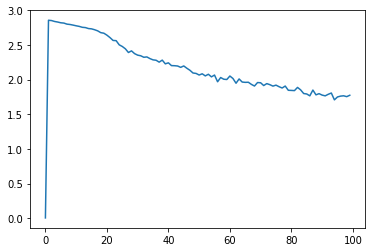

In [91]:
import matplotlib.pyplot as plt

plt.plot(all_losses)
plt.show()